In [5]:
# Importing Data Analysis libraries:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [6]:
data = pd.read_csv('Profitability_Report_cleanv2.csv').iloc[:,1:]
data.head()

,Jobs_Gross_Margin_Percentage,Jobs_Gross_Margin,Labor_Pay,Labor_Burden,Material_Costs,PO_Costs,Labor,Equipment_Costs,Jobs_Total,Materials__Equip__POs_As_percent_of_Sales,Labor_Burden_as_percent_of_Sales,Labor_Pay_as_percent_of_Sales,Sold_Hours,Total_Hours_Worked,Total_Technician_Paid_Time,NonBillable_Hours,Jobs_Total_Costs,Is_Lead,Opportunity,Warranty,Recall,Converted,Jobs_Subtotal,Pricebook_Price,Income,Estimates,Jobs_Estimate_Sales_Subtotal,Jobs_Estimate_Sales_Installed,Materials__Equipment__PO_Costs,Lead Generated From Source
0,0.0000,-952.71,132.9,61.57,379.12,379.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.10,6.10,3.18,952.71,0,1,0,0,0,0.0,0.00,0.0,0,0.0,0.0,758.24,Marketed Lead
1,-0.0505,-4.01,0.0,22.25,30.63,30.63,79.5,0.0,79.5,0.0,0.0,0.0,0.0,1.05,1.05,0.00,83.51,0,1,0,0,1,79.5,0.00,79.5,0,0.0,0.0,61.26,Marketed Lead
2,0.7059,254.13,91.0,14.87,0.00,0.00,360.0,0.0,360.0,0.0,0.0,0.0,0.5,2.13,2.33,1.63,105.87,0,1,0,0,1,360.0,285.00,360.0,0,0.0,0.0,0.00,Marketed Lead
3,0.5254,151.83,0.0,133.23,3.94,0.00,289.0,0.0,289.0,0.0,0.0,0.0,0.0,2.33,2.33,0.00,137.17,0,1,0,0,1,289.0,287.88,289.0,0,0.0,0.0,3.94,Marketed Lead
4,-0.6561,-32.15,0.0,81.15,0.00,0.00,49.0,0.0,49.0,0.0,0.0,0.0,0.0,1.42,1.90,0.00,81.15,0,1,0,0,0,49.0,0.00,49.0,0,0.0,0.0,0.00,Marketed Lead


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Jobs_Gross_Margin_Percentage               14480 non-null  float64
 1   Jobs_Gross_Margin                          14480 non-null  float64
 2   Labor_Pay                                  14480 non-null  float64
 3   Labor_Burden                               14480 non-null  float64
 4   Material_Costs                             14480 non-null  float64
 5   PO_Costs                                   14480 non-null  float64
 6   Labor                                      14480 non-null  float64
 7   Equipment_Costs                            14480 non-null  float64
 8   Jobs_Total                                 14480 non-null  float64
 9   Materials__Equip__POs_As_percent_of_Sales  14480 non-null  float64
 10  Labor_Burden_as_percen

In [8]:
nums = [c for c in data.columns if data[c].dtype != 'object'] # numrical features.
cats = [c for c in data.columns if data[c].dtype == 'object'] # categorical features.
nums

['Jobs_Gross_Margin_Percentage',
 'Jobs_Gross_Margin',
 'Labor_Pay',
 'Labor_Burden',
 'Material_Costs',
 'PO_Costs',
 'Labor',
 'Equipment_Costs',
 'Jobs_Total',
 'Materials__Equip__POs_As_percent_of_Sales',
 'Labor_Burden_as_percent_of_Sales',
 'Labor_Pay_as_percent_of_Sales',
 'Sold_Hours',
 'Total_Hours_Worked',
 'Total_Technician_Paid_Time',
 'NonBillable_Hours',
 'Jobs_Total_Costs',
 'Is_Lead',
 'Opportunity',
 'Warranty',
 'Recall',
 'Converted',
 'Jobs_Subtotal',
 'Pricebook_Price',
 'Income',
 'Estimates',
 'Jobs_Estimate_Sales_Subtotal',
 'Jobs_Estimate_Sales_Installed',
 'Materials__Equipment__PO_Costs']

In [9]:
cats

['Lead Generated From Source']

In [10]:
data[cats[0]].nunique() # Number of unique values in the only categorical feature ('Lead Generated From Source').

4

In [11]:
data[['Lead Generated From Source_Install','Lead Generated From Source_Marketed Lead','Lead Generated From Source_None','Lead Generated From Source_Service']] = pd.get_dummies(data[cats[0]],prefix='Lead Generated From Source') # using pd.getdummis to encode the categorical feature.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Jobs_Gross_Margin_Percentage               14480 non-null  float64
 1   Jobs_Gross_Margin                          14480 non-null  float64
 2   Labor_Pay                                  14480 non-null  float64
 3   Labor_Burden                               14480 non-null  float64
 4   Material_Costs                             14480 non-null  float64
 5   PO_Costs                                   14480 non-null  float64
 6   Labor                                      14480 non-null  float64
 7   Equipment_Costs                            14480 non-null  float64
 8   Jobs_Total                                 14480 non-null  float64
 9   Materials__Equip__POs_As_percent_of_Sales  14480 non-null  float64
 10  Labor_Burden_as_percen

In [12]:
data.drop('Lead Generated From Source',axis=1,inplace=True)

In [13]:
data.head()

,Jobs_Gross_Margin_Percentage,Jobs_Gross_Margin,Labor_Pay,Labor_Burden,Material_Costs,PO_Costs,Labor,Equipment_Costs,Jobs_Total,Materials__Equip__POs_As_percent_of_Sales,Labor_Burden_as_percent_of_Sales,Labor_Pay_as_percent_of_Sales,Sold_Hours,Total_Hours_Worked,Total_Technician_Paid_Time,NonBillable_Hours,Jobs_Total_Costs,Is_Lead,Opportunity,Warranty,Recall,Converted,Jobs_Subtotal,Pricebook_Price,Income,Estimates,Jobs_Estimate_Sales_Subtotal,Jobs_Estimate_Sales_Installed,Materials__Equipment__PO_Costs,Lead Generated From Source_Install,Lead Generated From Source_Marketed Lead,Lead Generated From Source_None,Lead Generated From Source_Service
0,0.0000,-952.71,132.9,61.57,379.12,379.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.10,6.10,3.18,952.71,0,1,0,0,0,0.0,0.00,0.0,0,0.0,0.0,758.24,0,1,0,0
1,-0.0505,-4.01,0.0,22.25,30.63,30.63,79.5,0.0,79.5,0.0,0.0,0.0,0.0,1.05,1.05,0.00,83.51,0,1,0,0,1,79.5,0.00,79.5,0,0.0,0.0,61.26,0,1,0,0
2,0.7059,254.13,91.0,14.87,0.00,0.00,360.0,0.0,360.0,0.0,0.0,0.0,0.5,2.13,2.33,1.63,105.87,0,1,0,0,1,360.0,285.00,360.0,0,0.0,0.0,0.00,0,1,0,0
3,0.5254,151.83,0.0,133.23,3.94,0.00,289.0,0.0,289.0,0.0,0.0,0.0,0.0,2.33,2.33,0.00,137.17,0,1,0,0,1,289.0,287.88,289.0,0,0.0,0.0,3.94,0,1,0,0
4,-0.6561,-32.15,0.0,81.15,0.00,0.00,49.0,0.0,49.0,0.0,0.0,0.0,0.0,1.42,1.90,0.00,81.15,0,1,0,0,0,49.0,0.00,49.0,0,0.0,0.0,0.00,0,1,0,0


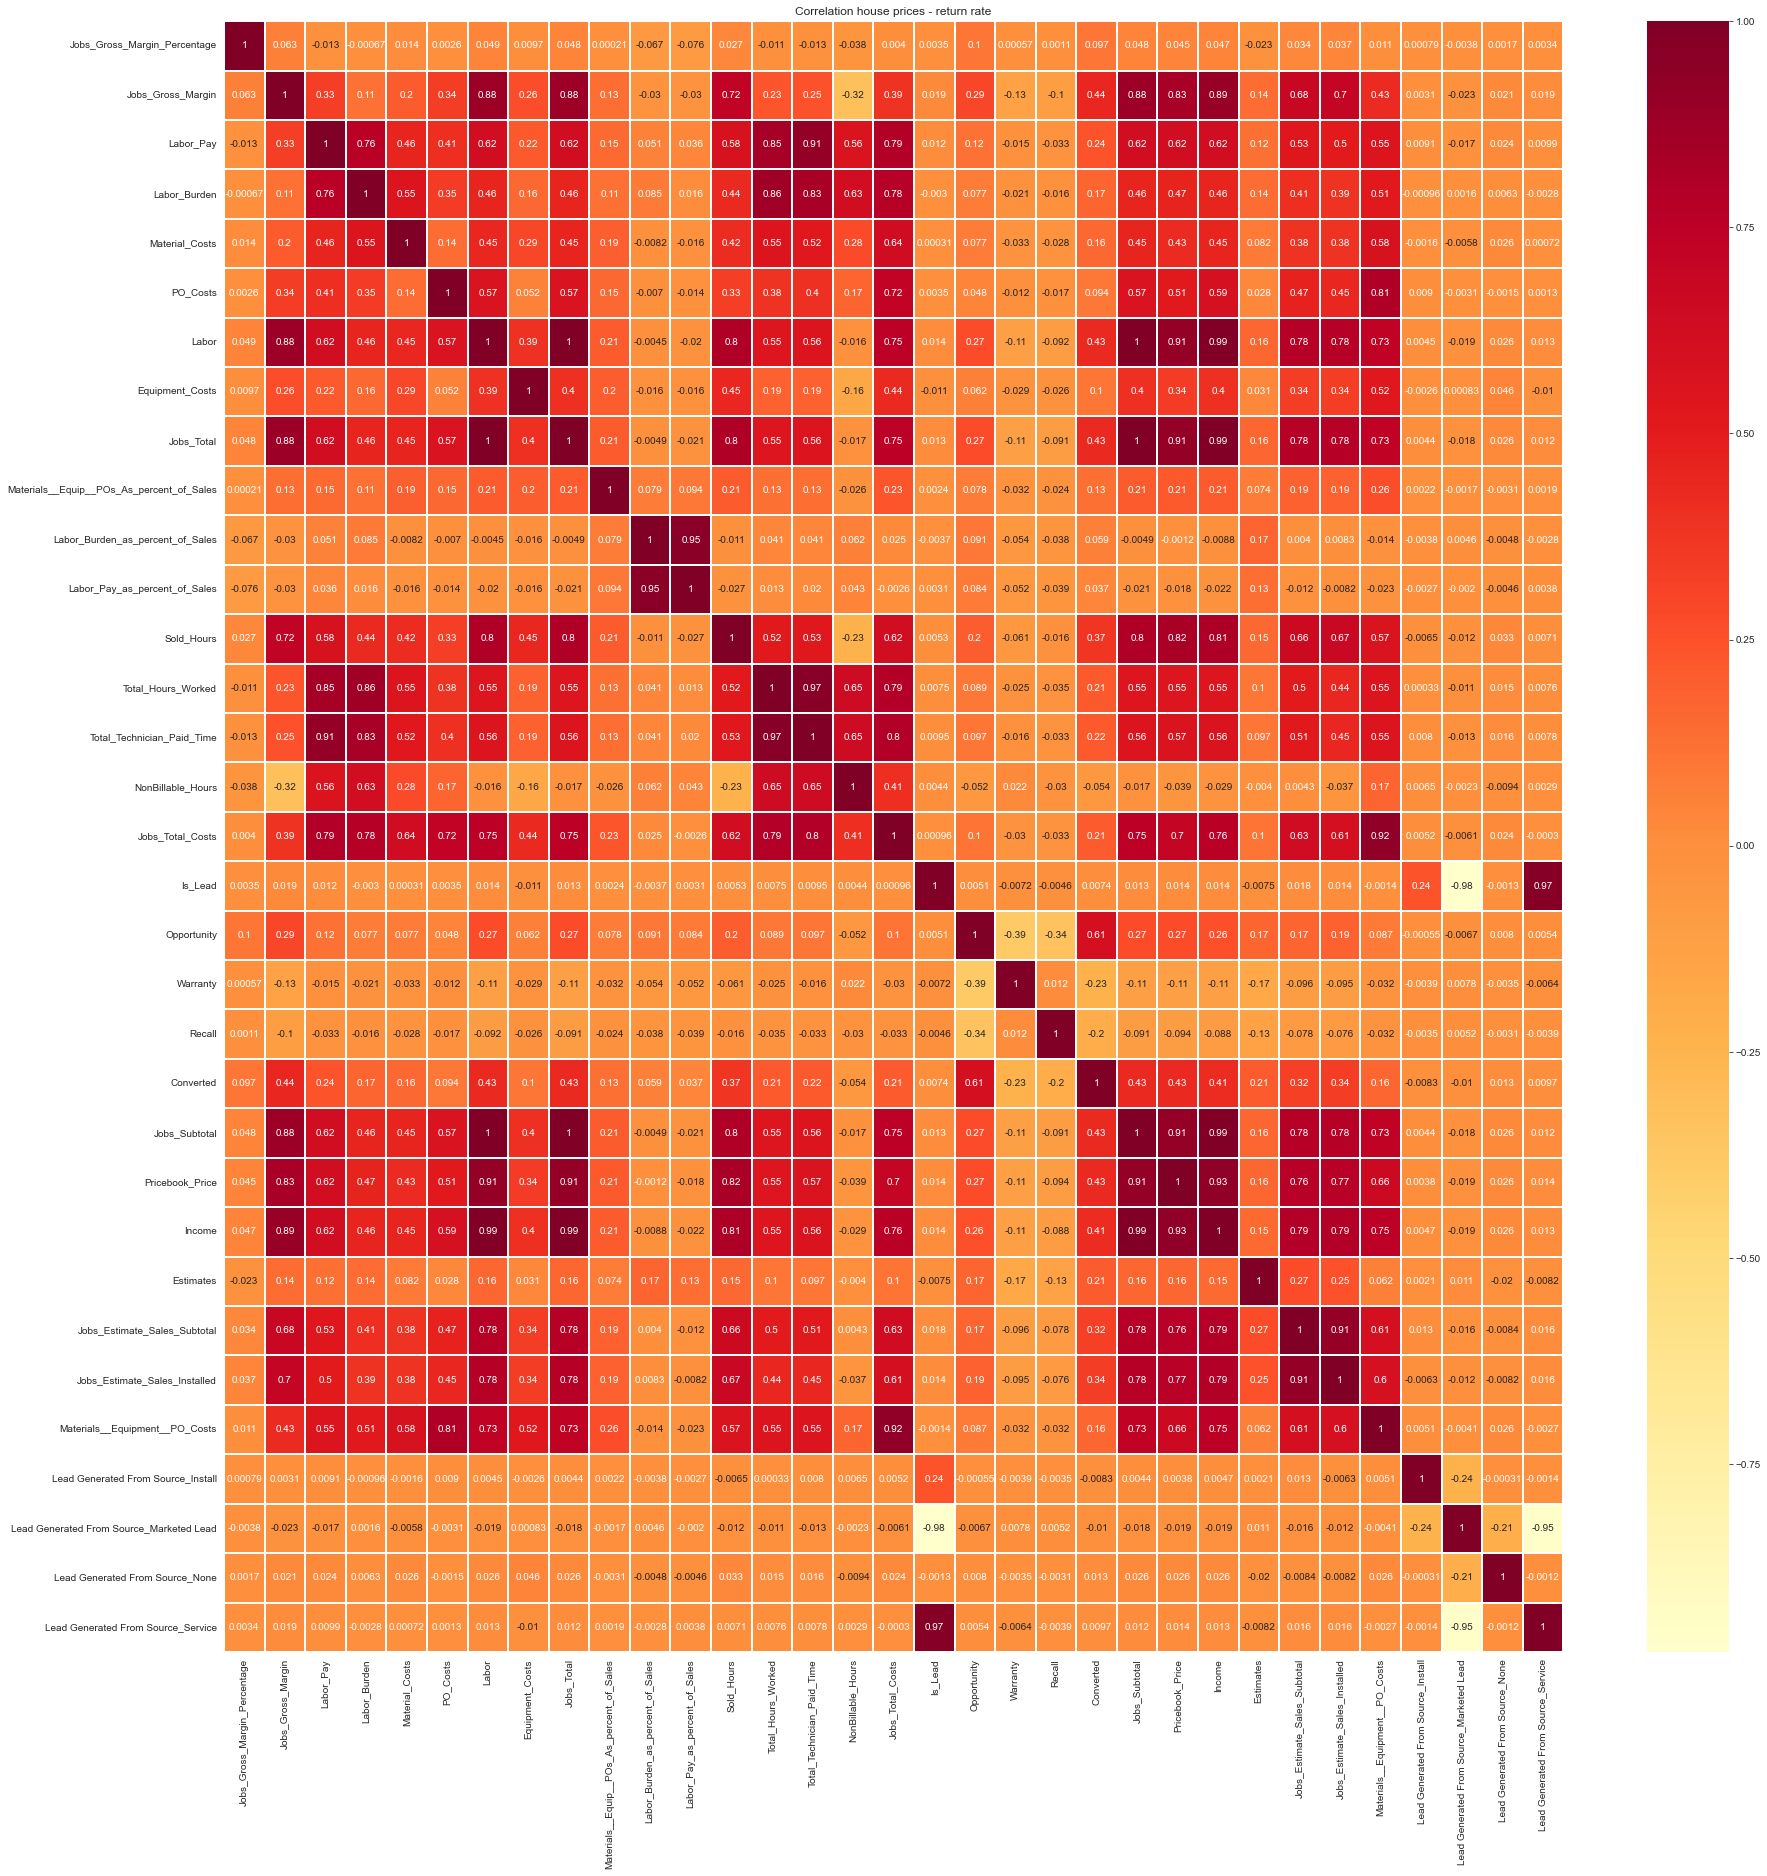

In [10]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="YlOrRd", linewidths=0.1, annot_kws={"fontsize":10})
plt.title("Correlation house prices - return rate");

In [14]:
correlation = np.abs(data.corr()['Jobs_Gross_Margin_Percentage']).sort_values(ascending=False).iloc[1:].reset_index().rename(columns = {'index':'cols'}) # creating a dataframe that has the correlations between Jobs_Gross_Margin_Percentage and each column in the dataset sorted.
correlation

,cols,Jobs_Gross_Margin_Percentage
0,Opportunity,0.103770
1,Converted,0.096863
2,Labor_Pay_as_percent_of_Sales,0.076282
3,Labor_Burden_as_percent_of_Sales,0.066561
4,Jobs_Gross_Margin,0.063354
5,Labor,0.048757
6,Jobs_Total,0.048254
7,Jobs_Subtotal,0.048252
8,Income,0.046631
9,Pricebook_Price,0.045136


In [15]:
data.isna().sum().sum() # checking if there are any null values.

0

In [16]:
# importing Machine Learning libraries:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

In [17]:
data_featured = data[['Jobs_Gross_Margin_Percentage']+list(correlation.cols.head(20))] # creating a new data frame that has only the top 20 most correlated features in the dataset to Jobs_Gross_Margin_Percentage.
data_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Jobs_Gross_Margin_Percentage      14480 non-null  float64
 1   Opportunity                       14480 non-null  int64  
 2   Converted                         14480 non-null  int64  
 3   Labor_Pay_as_percent_of_Sales     14480 non-null  float64
 4   Labor_Burden_as_percent_of_Sales  14480 non-null  float64
 5   Jobs_Gross_Margin                 14480 non-null  float64
 6   Labor                             14480 non-null  float64
 7   Jobs_Total                        14480 non-null  float64
 8   Jobs_Subtotal                     14480 non-null  float64
 9   Income                            14480 non-null  float64
 10  Pricebook_Price                   14480 non-null  float64
 11  NonBillable_Hours                 14480 non-null  float64
 12  Jobs

In [45]:
data_featured.describe()

,Jobs_Gross_Margin_Percentage,Opportunity,Converted,Labor_Pay_as_percent_of_Sales,Labor_Burden_as_percent_of_Sales,Jobs_Gross_Margin,Labor,Jobs_Total,Jobs_Subtotal,Income,Pricebook_Price,NonBillable_Hours,Jobs_Estimate_Sales_Installed,Jobs_Estimate_Sales_Subtotal,Sold_Hours,Estimates,Material_Costs,Total_Technician_Paid_Time,Labor_Pay,Total_Hours_Worked,Materials__Equipment__PO_Costs
count,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000
mean,-0.096734,0.811533,0.616022,13.841414,9.737390,297.455878,608.514127,599.496110,599.439235,578.234077,765.843169,0.630809,488.885367,563.681323,1.392409,1.825069,31.501349,2.634026,108.239668,2.051451,90.017158
std,8.054956,0.391098,0.486369,50.288746,33.419341,742.469461,1062.852933,1054.995364,1054.941515,1052.255588,1309.770272,2.226166,990.104959,1109.332691,1.972891,1.552540,123.318321,2.945050,116.131536,2.857031,338.203747
min,-638.633700,0.000000,0.000000,-5114.000000,-3249.950000,-11522.960000,0.000000,-50.000000,-50.000000,-1393.000000,0.000000,-20.900000,-50.000000,-99.000000,0.000000,0.000000,-1914.800000,0.000000,0.000000,0.020000,-702.440000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,-60.412500,0.000000,0.000000,0.000000,24.830000,0.000000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000,50.120000,0.770000,0.000000
50%,0.398650,1.000000,1.000000,6.595000,2.930000,100.500000,264.470000,250.835000,250.835000,226.950000,323.010000,0.500000,49.000000,140.250000,0.760000,2.000000,0.000000,1.930000,78.460000,1.380000,0.000000
75%,0.677500,1.000000,1.000000,17.710000,12.970000,431.565000,724.730000,714.022500,714.022500,675.557500,890.930000,1.120000,581.565000,662.250000,2.000000,3.000000,15.970000,3.050000,128.190000,2.430000,37.425000
max,166.984300,1.000000,1.000000,619.080000,416.290000,19446.880000,34104.380000,34104.380000,34104.380000,34104.380000,27686.210000,83.180000,27216.000000,27216.000000,33.250000,11.000000,4529.780000,86.900000,3066.420000,109.520000,12650.710000


In [18]:
# Creating train and test sets:
X = data_featured.drop(['Jobs_Gross_Margin_Percentage'], axis =1)
y = data_featured.Jobs_Gross_Margin_Percentage

X_scaled= StandardScaler().fit_transform(X.values)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

## RandomForestRegressor:

In [30]:
rf_grid = {'n_estimators' : [50,100,200,300,500],
           'max_features' : ["auto", "sqrt", "log2"],
           'max_depth' : [3,6]}

rf = RandomForestRegressor()

grid = GridSearchCV(rf, rf_grid).fit(X_train,y_train)

In [ ]:
rf = grid.best_estimator_
rf

RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=300)

#### Mean absolute error:

In [31]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.3795662917944224

#### Model accuracy score:

In [ ]:
rf.score(X_valid, y_valid)

0.613086294308927

## KNeighborsRegressor:

In [44]:
KNN_grid = {'n_neighbors' : list(range(3,100,2))}

knn = KNeighborsRegressor()

grid = GridSearchCV(knn, KNN_grid).fit(X_train,y_train)

In [46]:
knn = grid.best_estimator_
knn

KNeighborsRegressor(n_neighbors=63)

#### Mean absolute error:

In [47]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.9816945694115582

#### Model accuracy score:

In [52]:
knn.score(X_valid, y_valid)

0.011338126152377392

## SVR:

In [16]:
# I used this technique becuase SVR was taking so much time with GridSearch and I wanted to track its process to see if it was really working.
params = []
errors = []
i = 1
for C in [1, 10]:
    for gamma in [0.1, 0.01, 0.001]:
        for kernel in ['linear', 'rbf']:
            params.append((C,gamma,kernel))
            svr = SVR(C=C,gamma=gamma,kernel=kernel)
            svr.fit(X_train,y_train)
            y_pred = svr.predict(X_valid)
            errors.append((mean_absolute_error(y_valid, y_pred)))
            print(i, ' -> ', end='')
            i+=1

1  -> 2  -> 3  -> 4  -> 5  -> 6  -> 7  -> 8  -> 9  -> 10  -> 11  -> 12  -> 

In [17]:
errors = pd.Series(errors)
errors 

0     0.820185
1     0.732374
2     0.820185
3     0.762751
4     0.820185
5     0.803195
6     0.820205
7     0.717846
8     0.820205
9     0.748101
10    0.820205
11    0.789050
dtype: float64

In [18]:
errors.sort_values() # sorting each group of parameters mean absolute error sorted ascendingly to see which group is better.

7     0.717846
1     0.732374
9     0.748101
3     0.762751
11    0.789050
5     0.803195
0     0.820185
2     0.820185
4     0.820185
6     0.820205
8     0.820205
10    0.820205
dtype: float64

In [22]:
params[7]

(10, 0.1, 'rbf')

#### Mean absolute error:

In [23]:
svr = SVR(C=10,gamma=0.1,kernel='rbf')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.7178464101704215

#### Model accuracy score:

In [26]:
svr.score(X_valid, y_valid)

0.004274293958314801

## Ridge:

In [20]:
R_grid = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

R = Ridge()

grid = GridSearchCV(R, R_grid).fit(X_train,y_train)

In [21]:
R = grid.best_estimator_
R

Ridge(alpha=100)

#### Mean absolute error:

In [22]:
R.fit(X_train,y_train)
y_pred = R.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

1.0747491098865538

#### Model accuracy score:

In [23]:
R.score(X_valid, y_valid)

0.00983973918748704

## XGBRegressor:

In [25]:
XGB_grid = {"learning_rate": (0.05, 0.10, 0.15),
            "max_depth": [4, 6, 8],
            "min_child_weight": [ 1, 3, 5, 7],
            "gamma":[ 0.0, 0.1, 0.2]}

XGB = XGBRegressor()

grid = GridSearchCV(XGB, XGB_grid).fit(X_train,y_train)

In [28]:
XGB = grid.best_estimator_
XGB

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### Mean Absolute error:

In [29]:
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.31454011584235697

#### Model accuracy score:

In [30]:
XGB.score(X_valid, y_valid)

0.5871162202537539

In [27]:
!pip install eli5

     ------------------------------------ 216.2/216.2 kB 507.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
  Running setup.py install for eli5: started
  Running setup.py install for eli5: finished with status 'done'


  DEPRECATION: eli5 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


### Because Random Forest has the higher model score and XGBoost has the lower mean absolute error, I'll perform feature selection on both to see which one of them are really better.

## Random Forest feature selection:

In [32]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=0).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.6607 ± 0.0707,Income
0.4550 ± 0.3842,Jobs_Gross_Margin
0.0185 ± 0.0208,Total_Hours_Worked
0.0044 ± 0.0003,Material_Costs
0.0031 ± 0.0062,Total_Technician_Paid_Time
0.0021 ± 0.0048,Pricebook_Price
0.0017 ± 0.0029,Materials__Equipment__PO_Costs
0.0009 ± 0.0048,NonBillable_Hours
0.0007 ± 0.0030,Sold_Hours
0.0007 ± 0.0024,Labor_Pay


In [91]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(perm, threshold=0.1, prefit=True)
X_train_super = sel.transform(X_train)
X_valid_super = sel.transform(X_valid)

In [92]:
X_train_super.shape

(11584, 2)

In [93]:
rf.fit(X_train_super, y_train)
y_pred = rf.predict(X_valid_super)
mean_absolute_error(y_valid, y_pred)

0.30300632443570563

In [94]:
rf.score(X_valid_super, y_valid)

0.6633360016822505

### Error = 0.3

### Score = 66.33%

## XGBoost feature selection:

In [31]:
perm = PermutationImportance(XGB, random_state=0).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.7191 ± 0.0798,Income
0.5043 ± 0.4002,Jobs_Gross_Margin
0.0617 ± 0.0012,Jobs_Total
0.0004 ± 0.0002,Opportunity
0.0001 ± 0.0001,Labor
0.0001 ± 0.0003,Material_Costs
0.0001 ± 0.0001,Total_Hours_Worked
0.0001 ± 0.0000,Labor_Pay
0.0000 ± 0.0000,Total_Technician_Paid_Time
0.0000 ± 0.0000,Materials__Equipment__PO_Costs


In [41]:
sel = SelectFromModel(perm, threshold=0.1, prefit=True)
X_train_super = sel.transform(X_train)
X_valid_super = sel.transform(X_valid)

In [42]:
X_train_super.shape

(11584, 2)

In [43]:
XGB.fit(X_train_super, y_train)
y_pred = XGB.predict(X_valid_super)
mean_absolute_error(y_valid, y_pred)

0.1817165799162829

In [44]:
XGB.score(X_valid_super, y_valid)

0.6883845315224406

### Error = 0.18

### Score = 68.84%

## I can say that the most accurate model was XGBoost model.